In [1]:
# -*- coding: utf-8 -*-
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# task 1

In [352]:
# Generating underlying 2nd order AR process

p = 2 # model order
N = 400 # length of time series
x = np.zeros(N)
x[0], x[1] = 0.1, -0.1 # initial values

theta1 = np.asarray([0.3 for n in range(N)])
theta2 = np.asarray([0.5 for n in range(N)])
theta_true = np.asarray([theta1, theta2])

R_true = 0.05 # measurement variance
Q_true = 0.01*np.identity(2) # Process Covariance

np.random.seed(20)
v = np.random.normal(0, R_true, N) # measurement noise

for n in range(2, N):
    x[n] = theta_true[0][n]*x[n-1] + theta_true[1][n]*x[n-2] + v[n]
    
n = np.arange(N) # time index

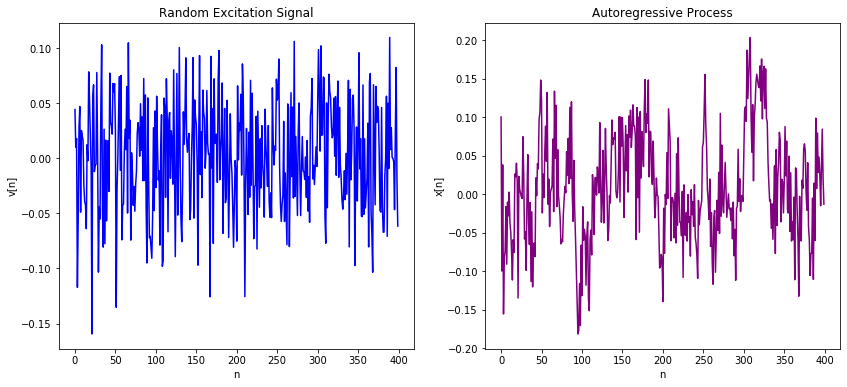

In [353]:
# Plotting synthetic data
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set_title("Random Excitation Signal")
ax[0].set(xlabel="n", ylabel="v[n]")
ax[0].plot(n, v, c='b')
ax[1].set_title("Autoregressive Process")
ax[1].set(xlabel="n", ylabel="x[n]")
ax[1].plot(n, x, c='purple')
#plt.savefig('AR.jpg')
plt.show()

In [354]:
# task 2

In [355]:
# Kalman filter
def kf(N, p, Q, R, theta_init, x, theta_true):
    """ N = length of time series. p = AR model order. R = measurement variance. Q = process covariance."""
    
    E_history = np.zeros(N)
    theta_history = np.zeros((N, p))
    P_history = np.zeros((N, p, p))
    
    E_history[0] = (1/p)*(theta_true[:,0] - theta_init).T @ (theta_true[:,0] - theta_init)
    E_history[1] = (1/p)*(theta_true[:,1] - theta_init).T @ (theta_true[:,1] - theta_init)
    theta_history[0:2] = theta_init, theta_init
    P_history[0:2] = Q, Q
    
    # initialise theta, P
    theta = theta_init
    P = np.zeros((p,p))
    
    for n in range(2,N):

        # prediction step
        P = P + Q # P(n|n-1) = P(n-1|n-1)
        theta = theta # theta(n|n-1) = theta(n-1|n-1)
    
        # predict target signal
        x_hat = x[n-p:n].reshape(1,p) @ theta
    
        # innovation error
        e = x[n] - x_hat
    
        # kalman gain
        KG_const = R + x[n-p:n].reshape(1,p) @ P @ x[n-p:n]
        KG = (1/KG_const)*(P @ x[n-p:n])
    
        # posterior update
        theta = theta + e*KG # theta(n|n) = theta(n|n-1) + error*gain
        P = (np.identity(2) - KG.reshape(p,1) @ x[n-p:n].reshape(1,p)) @ P # P(n|n) = (I - KG*x)*P(n|n-1)
    
        E_history[n] = (1/p)*(theta_true[:,n] - theta).T @ (theta_true[:,n] - theta)
        theta_history[n] = theta
        P_history[n] = P
    
        
    return theta, P, theta_history, P_history, E_history

In [356]:
theta_init = np.asarray([-1.0, 4.0])
Q = 0.01*np.identity(2) # these are hyperparameters of our model
R = 0.1
test6 = kf(N, p, Q, R, theta_init, x, theta_true) #R_true = 0.2, Q_true =  0.01*I

In [357]:
theta_init = np.asarray([-1.0, 4.0])
Q = 0.01*np.identity(2) # these are hyperparameters of our model
R = 0.1
test7 = kf(N, p, Q, R, theta_init, x, theta_true) #R_true = 0.4, Q_true =  0.01*I

In [358]:
theta_init = np.asarray([-1.0, 4.0])
Q = 0.01*np.identity(2) # these are hyperparameters of our model
R = 0.1
test8 = kf(N, p, Q, R, theta_init, x, theta_true) #R_true = 0.6, Q_true =  0.01*I

In [359]:
theta_init = np.asarray([-1.0, 4.0])
Q = 0.01*np.identity(2) # these are hyperparameters of our model
R = 0.1
test9 = kf(N, p, Q, R, theta_init, x, theta_true) #R_true = 0.8, Q_true =  0.01*I

In [360]:
theta_init = np.asarray([-1.0, 4.0])
Q = 0.01*np.identity(2) # these are hyperparameters of our model
R = 0.1
test10 = kf(N, p, Q, R, theta_init, x, theta_true) #R_true = 1.0, Q_true =  0.01*I

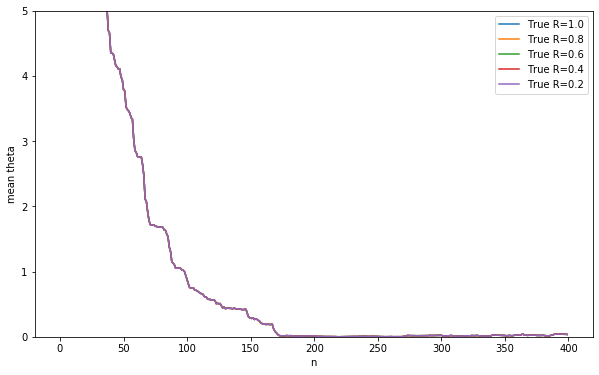

In [361]:
plt.figure(figsize=(10,6))
plt.plot(n, test10[4], label='True R=1.0')
plt.plot(n, test9[4], label='True R=0.8')
plt.plot(n, test8[4], label='True R=0.6')
plt.plot(n, test7[4], label='True R=0.4')
plt.plot(n, test6[4], label='True R=0.2')
plt.xlabel('n')
plt.ylabel('mean theta')
plt.legend()
plt.ylim(0, 5)
#plt.savefig('MSE_R_true.jpg')
plt.show()

In [362]:
# find time of convergence
group_tests = np.asarray([test6[4], test7[4], test8[4], test9[4], test10[4]])
convergence = np.zeros(5)

for i in range(5):
    for j in range(N):
        if group_tests[i][j] < 0.1:
            convergence[i] = j
            break
print("convergence time of test 1 was:", convergence[0])
print("convergence time of test 2 was:", convergence[1])
print("convergence time of test 3 was:", convergence[2])
print("convergence time of test 4 was:", convergence[3])
print("convergence time of test 5 was:", convergence[4])

convergence time of test 1 was: 169.0
convergence time of test 2 was: 169.0
convergence time of test 3 was: 169.0
convergence time of test 4 was: 169.0
convergence time of test 5 was: 169.0


In [363]:
Q = 0.01*np.identity(2) # these are hyperparameters of our model
R = 0.05
theta_init = np.asarray([4.0, -1.0])
test0 = kf(N, p, Q, R, theta_init, x, theta_true)

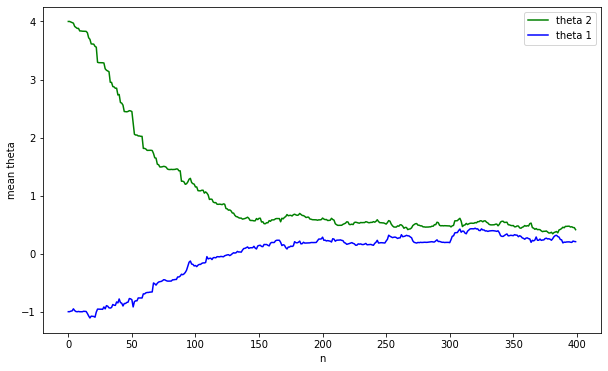

In [364]:
# time evolution of estimated theta
plt.figure(figsize=(10,6))
plt.plot(n, test0[2][:,0], c='g', label='theta 2')
plt.plot(n, test0[2][:,1], c='b', label='theta 1')
plt.xlabel('n')
plt.ylabel('mean theta')
plt.legend()
#plt.savefig('theta_mean.jpg')
plt.show()

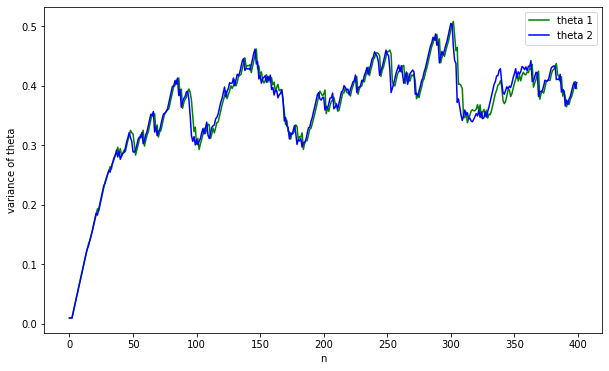

In [365]:
# time evolution of confidence in theta
plt.figure(figsize=(10,6))
plt.plot(n, test0[3][:,0,0], c='g', label='theta 1')
plt.plot(n, test0[3][:,1,1], c='b', label='theta 2')
plt.xlabel('n')
plt.ylabel('variance of theta')
plt.legend()
#plt.savefig('P_variance.jpg')
plt.show()

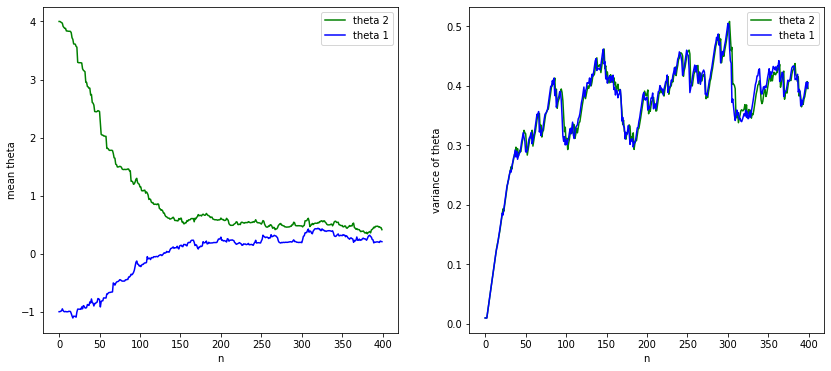

In [366]:
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="n", ylabel="mean theta")
ax[0].plot(n, test0[2][:,0], c='g', label='theta 2')
ax[0].plot(n, test0[2][:,1], c='b', label='theta 1')
ax[0].legend()
ax[1].set(xlabel="n", ylabel="variance of theta")
ax[1].plot(n, test0[3][:,0,0], c='g', label='theta 2')
ax[1].plot(n, test0[3][:,1,1], c='b', label='theta 1')
ax[1].legend()
#plt.savefig('const_mean_var.jpg')
plt.show()

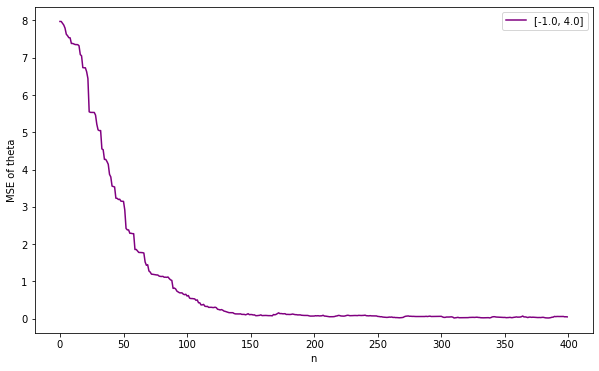

In [367]:
# time evolution of MSE
plt.figure(figsize=(10,6))
plt.plot(n, test0[4], c='purple', label='[-1.0, 4.0]')
plt.xlabel('n')
plt.ylabel('MSE of theta')
plt.legend()
#plt.savefig('MSE_theta.jpg')
plt.show()

In [368]:
# find time of convergence
for j in range(N):
    if test0[4][j] < 0.1:
        convergence0 = j
        break

In [369]:
print("convergence time of test 0 was:", convergence0)

convergence time of test 0 was: 154


In [370]:
# task 3

In [371]:
np.random.seed(0)
theta_init1 = np.random.uniform(-10, 10, 2)
test1 = kf(N, p, Q, R, theta_init1, x, theta_true)

np.random.seed(5)
theta_init2 = np.random.uniform(-10, 10, 2)
test2 = kf(N, p, Q, R, theta_init2, x, theta_true)

np.random.seed(10)
theta_init3 = np.random.uniform(-10, 10, 2)
test3 = kf(N, p, Q, R, theta_init3, x, theta_true)

np.random.seed(15)
theta_init4 = np.random.uniform(-10, 10, 2)
test4 = kf(N, p, Q, R, theta_init4, x, theta_true)

np.random.seed(20)
theta_init5 = np.random.uniform(-10, 10, 2)
test5 = kf(N, p, Q, R, theta_init5, x, theta_true)

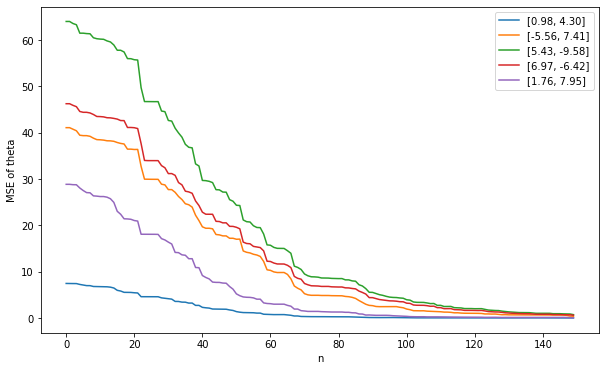

In [372]:
# time evolution of MSE- varying initial conditions
plt.figure(figsize=(10,6))
plt.plot(n[0:150], test1[4][0:150], label='[0.98, 4.30]')
plt.plot(n[0:150], test2[4][0:150], label='[-5.56, 7.41]')
plt.plot(n[0:150], test3[4][0:150], label='[5.43, -9.58]')
plt.plot(n[0:150], test4[4][0:150], label='[6.97, -6.42]')
plt.plot(n[0:150], test5[4][0:150], label='[1.76, 7.95]')
plt.xlabel('n')
plt.ylabel('MSE of theta')
plt.legend()
#plt.savefig('MSE_init_theta.jpg')
plt.show()

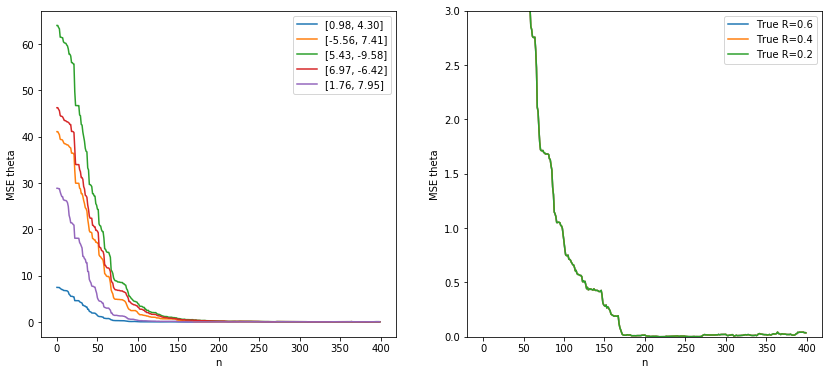

In [373]:
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="n", ylabel="MSE theta")
ax[0].plot(n, test1[4], label='[0.98, 4.30]')
ax[0].plot(n, test2[4], label='[-5.56, 7.41]')
ax[0].plot(n, test3[4], label='[5.43, -9.58]')
ax[0].plot(n, test4[4], label='[6.97, -6.42]')
ax[0].plot(n, test5[4], label='[1.76, 7.95]')
ax[0].legend()
ax[1].set(xlabel="n", ylabel="MSE theta")
#ax[1].plot(n, test10[4], label='True R=1.0')
#ax[1].plot(n, test9[4], label='True R=0.8')
ax[1].plot(n, test8[4], label='True R=0.6')
ax[1].plot(n, test7[4], label='True R=0.4')
ax[1].plot(n, test6[4], label='True R=0.2')
plt.ylim(0, 3)
ax[1].legend()
#plt.savefig('MSE_init_R_true.jpg')
plt.show()

In [374]:
# find time of convergence
group_tests = np.asarray([test1[4], test2[4], test3[4], test4[4], test5[4]])
convergence = np.zeros(5)

for i in range(5):
    for j in range(N):
        if group_tests[i][j] < 0.1:
            convergence[i] = j
            break

In [375]:
print("convergence time of test 1 was:", convergence[0])
print("convergence time of test 2 was:", convergence[1])
print("convergence time of test 3 was:", convergence[2])
print("convergence time of test 4 was:", convergence[3])
print("convergence time of test 5 was:", convergence[4])

convergence time of test 1 was: 91.0
convergence time of test 2 was: 169.0
convergence time of test 3 was: 250.0
convergence time of test 4 was: 250.0
convergence time of test 5 was: 148.0


In [376]:
# task 4

In [377]:
R1 = 0.2
test6 = kf(N, p, Q, R1, theta_init, x, theta_true)

R2 = 0.4
test7 = kf(N, p, Q, R2, theta_init, x, theta_true)

R3 = 0.6
test8 = kf(N, p, Q, R3, theta_init, x, theta_true)

R4 = 0.8
test9 = kf(N, p, Q, R4, theta_init, x, theta_true)

R5 = 1.0
test10 = kf(N, p, Q, R5, theta_init, x, theta_true)

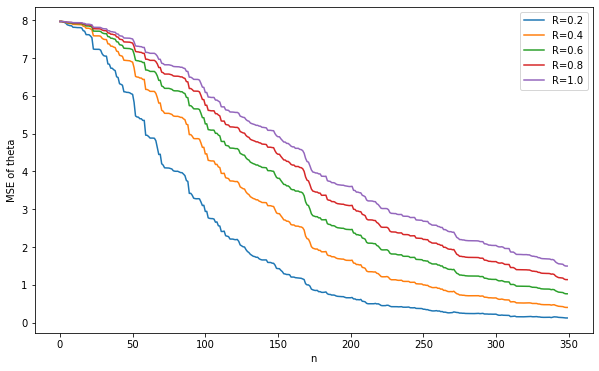

In [378]:
# time evolution of MSE- varying R (measurement variance)
plt.figure(figsize=(10,6))
plt.plot(n[0:350], test6[4][0:350], label='R=0.2')
plt.plot(n[0:350], test7[4][0:350], label='R=0.4')
plt.plot(n[0:350], test8[4][0:350], label='R=0.6')
plt.plot(n[0:350], test9[4][0:350], label='R=0.8')
plt.plot(n[0:350], test10[4][0:350], label='R=1.0')
plt.xlabel('n')
plt.ylabel('MSE of theta')
plt.legend()
#plt.savefig('MSE_R_theta.jpg')
plt.show()

In [379]:
# find time of convergence
group_tests = np.asarray([test6[4], test7[4], test8[4], test9[4], test10[4]])
convergence = np.zeros(5)

for i in range(5):
    for j in range(N):
        if group_tests[i][j] < 0.1:
            convergence[i] = j
            break

In [380]:
print("convergence time of test 1 was:", convergence[0])
print("convergence time of test 2 was:", convergence[1])
print("convergence time of test 3 was:", convergence[2])
print("convergence time of test 4 was:", convergence[3])
print("convergence time of test 5 was:", convergence[4])

convergence time of test 1 was: 368.0
convergence time of test 2 was: 0.0
convergence time of test 3 was: 0.0
convergence time of test 4 was: 0.0
convergence time of test 5 was: 0.0


In [381]:
Q1 = np.asarray([[0.1, 0], [0, 0.5]])
test11 = kf(N, p, Q1, R, theta_init, x, theta_true)

Q2 = np.asarray([[0.1, 0], [0, 0.5]])
test12 = kf(N, p, Q2, R, theta_init, x, theta_true)

Q3 = np.asarray([[0.2, 0], [0, 0.4]])
test13 = kf(N, p, Q3, R, theta_init, x, theta_true)

Q4 = np.asarray([[0.4, 0], [0, 0.2]])
test14 = kf(N, p, Q4, R, theta_init, x, theta_true)

Q5 = 0.3*np.identity(2) 
test15 = kf(N, p, Q5, R, theta_init, x, theta_true)

Q6 = 0.05*np.identity(2) 
test33 = kf(N, p, Q6, R, theta_init, x, theta_true)

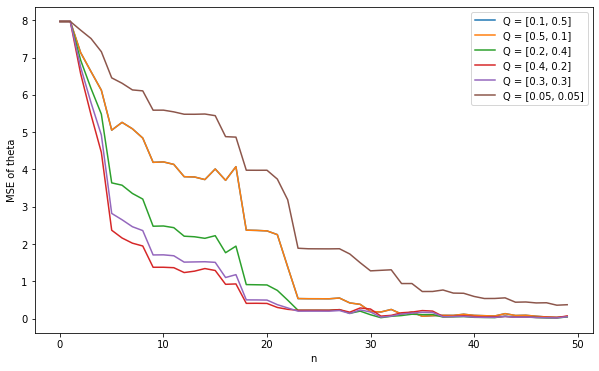

In [382]:
# time evolution of MSE- varying Q (Process Covariance)
plt.figure(figsize=(10,6))
plt.plot(n[0:50], test11[4][0:50], label='Q = [0.1, 0.5]')
plt.plot(n[0:50], test12[4][0:50], label='Q = [0.5, 0.1]')
plt.plot(n[0:50], test13[4][0:50], label='Q = [0.2, 0.4]')
plt.plot(n[0:50], test14[4][0:50], label='Q = [0.4, 0.2]')
plt.plot(n[0:50], test15[4][0:50], label='Q = [0.3, 0.3]')
plt.plot(n[0:50], test33[4][0:50], label='Q = [0.05, 0.05]')
plt.xlabel('n')
plt.ylabel('MSE of theta')
plt.legend()
#plt.savefig('MSE_Q_theta.jpg')
plt.show()

In [383]:
# find time of convergence
group_tests = np.asarray([test11[4], test12[4], test13[4], test14[4], test15[4], test33[4]])
convergence = np.zeros(6)

for i in range(6):
    for j in range(N):
        if group_tests[i][j] < 0.2:
            convergence[i] = j
            break

In [384]:
print("convergence time of test 1 was:", convergence[0])
print("convergence time of test 2 was:", convergence[1])
print("convergence time of test 3 was:", convergence[2])
print("convergence time of test 4 was:", convergence[3])
print("convergence time of test 5 was:", convergence[4])
print("convergence time of test 6 was:", convergence[5])

convergence time of test 1 was: 30.0
convergence time of test 2 was: 30.0
convergence time of test 3 was: 28.0
convergence time of test 4 was: 28.0
convergence time of test 5 was: 23.0
convergence time of test 6 was: 52.0


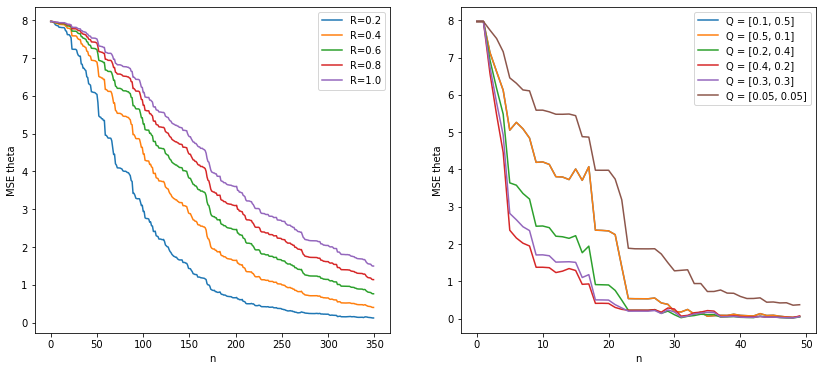

In [385]:
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="n", ylabel="MSE theta")
ax[0].plot(n[0:350], test6[4][0:350], label='R=0.2')
ax[0].plot(n[0:350], test7[4][0:350], label='R=0.4')
ax[0].plot(n[0:350], test8[4][0:350], label='R=0.6')
ax[0].plot(n[0:350], test9[4][0:350], label='R=0.8')
ax[0].plot(n[0:350], test10[4][0:350], label='R=1.0')
ax[0].legend()
ax[1].set(xlabel="n", ylabel="MSE theta")
ax[1].plot(n[0:50], test11[4][0:50], label='Q = [0.1, 0.5]')
ax[1].plot(n[0:50], test12[4][0:50], label='Q = [0.5, 0.1]')
ax[1].plot(n[0:50], test13[4][0:50], label='Q = [0.2, 0.4]')
ax[1].plot(n[0:50], test14[4][0:50], label='Q = [0.4, 0.2]')
ax[1].plot(n[0:50], test15[4][0:50], label='Q = [0.3, 0.3]')
ax[1].plot(n[0:50], test33[4][0:50], label='Q = [0.05, 0.05]')
ax[1].legend()
#plt.savefig('MSE_R_Q_theta.jpg')
plt.show()

In [386]:
# task 5

In [387]:
# Generating underlying 2nd order AR process

x_tv = np.zeros(N)
x_tv[0], x_tv[1] = 0.1, -0.1 # initial values

t = np.linspace(-1.0,1.0, N)
theta1_tv = np.asarray([0.3 - 0.05*t[n]**3 for n in range(N)])
theta2_tv = np.asarray([0.5 + 0.1*t[n]**3 for n in range(N)])
theta_true_tv = np.asarray([theta1_tv, theta2_tv])

for n in range(2, N):
    x_tv[n] = theta_true_tv[0][n]*x_tv[n-1] + theta_true_tv[1][n]*x_tv[n-2] + v[n]
    
n = np.arange(N) # time index

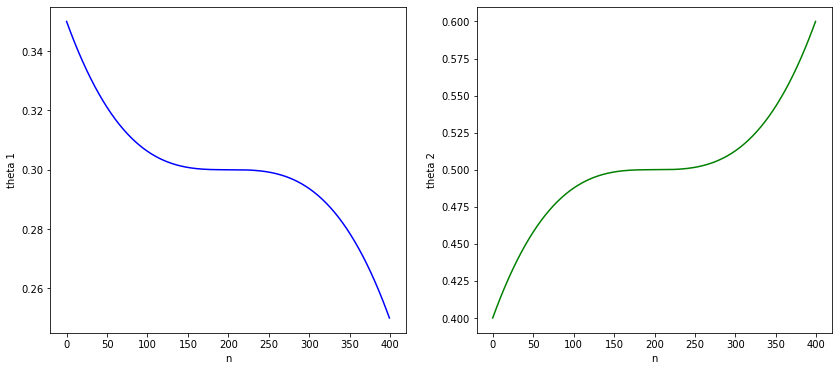

In [388]:
# Plotting time varying theta
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="n", ylabel="theta 1")
ax[0].plot(n, theta_true_tv[0], c='b')
ax[1].set(xlabel="n", ylabel="theta 2")
ax[1].plot(n, theta_true_tv[1], c='g')
#plt.savefig('theta_vary.jpg')
plt.show()

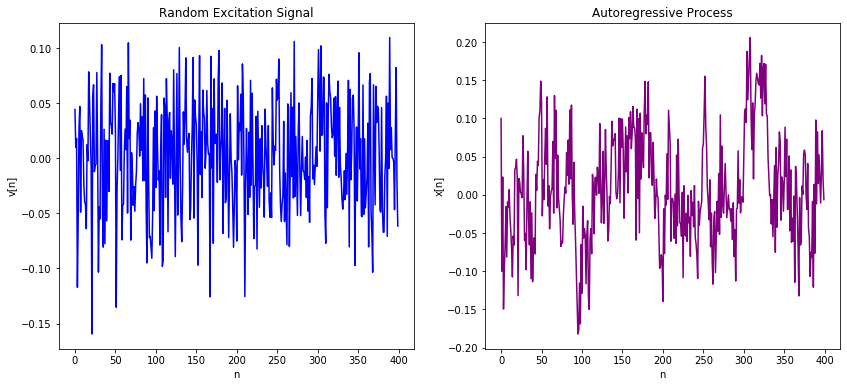

In [389]:
# Plotting time varying synthetic data
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set_title("Random Excitation Signal")
ax[0].set(xlabel="n", ylabel="v[n]")
ax[0].plot(n, v, c='b')
ax[1].set_title("Autoregressive Process")
ax[1].set(xlabel="n", ylabel="x[n]")
ax[1].plot(n, x_tv, c='purple')
#plt.savefig('AR_tv.jpg')
plt.show()

In [390]:
# task 6

In [391]:
test16 = kf(N, p, Q, R, theta_init, x_tv, theta_true_tv)

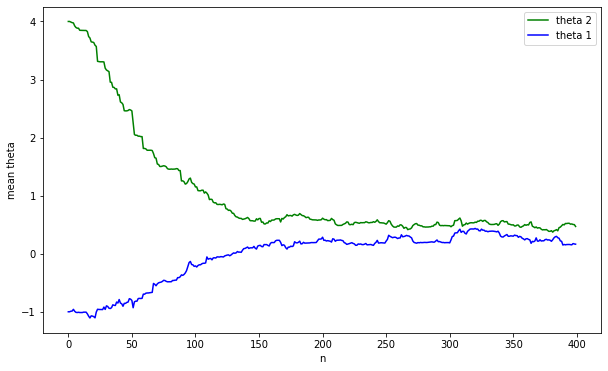

In [392]:
# time evolution of estimated theta
plt.figure(figsize=(10,6))
plt.plot(n, test16[2][:,0], c='g', label='theta 2')
plt.plot(n, test16[2][:,1], c='b', label='theta 1')
plt.xlabel('n')
plt.ylabel('mean theta')
plt.legend()
#plt.savefig('theta_tv_mean.jpg')
plt.show()

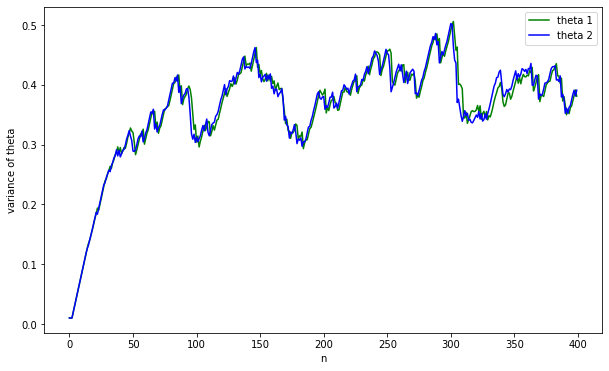

In [393]:
# time evolution of confidence in theta
plt.figure(figsize=(10,6))
plt.plot(n, test16[3][:,0,0], c='g', label='theta 1')
plt.plot(n, test16[3][:,1,1], c='b', label='theta 2')
plt.xlabel('n')
plt.ylabel('variance of theta')
plt.legend()
#plt.savefig('P_tv_variance.jpg')
plt.show()

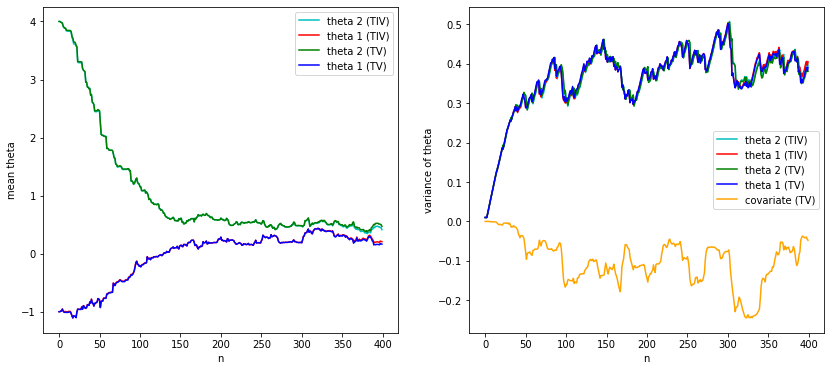

In [394]:
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="n", ylabel="mean theta")
ax[0].plot(n, test0[2][:,0], c='c', label='theta 2 (TIV)')
ax[0].plot(n, test0[2][:,1], c='r', label='theta 1 (TIV)')
ax[0].plot(n, test16[2][:,0], c='g', label='theta 2 (TV)')
ax[0].plot(n, test16[2][:,1], c='b', label='theta 1 (TV)')
ax[0].legend()
ax[1].set(xlabel="n", ylabel="variance of theta")
ax[1].plot(n, test0[3][:,0,0], c='c', label='theta 2 (TIV)')
ax[1].plot(n, test0[3][:,1,1], c='r', label='theta 1 (TIV)')
ax[1].plot(n, test16[3][:,0,0], c='g', label='theta 2 (TV)')
ax[1].plot(n, test16[3][:,1,1], c='b', label='theta 1 (TV)')
ax[1].plot(n, test16[3][:,0,1], c='orange', label='covariate (TV)')
ax[1].legend()
#plt.savefig('tv_mean_var.jpg')
plt.show()

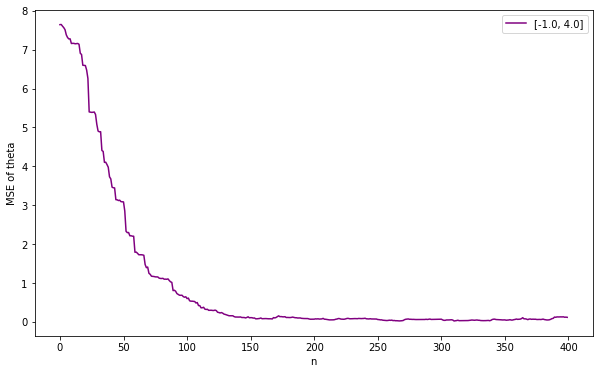

In [395]:
# time evolution of MSE
plt.figure(figsize=(10,6))
plt.plot(n, test16[4], c='purple', label='[-1.0, 4.0]')
plt.xlabel('n')
plt.ylabel('MSE of theta')
plt.legend()
#plt.savefig('MSE_theta_tv.jpg')
plt.show()

In [396]:
# find time of convergence
for j in range(N):
    if test16[4][j] < 0.1:
        convergence0 = j
        break
        
print("convergence time of test 0 was:", convergence0)

convergence time of test 0 was: 152


In [397]:
test17 = kf(N, p, Q, R, theta_init1, x_tv, theta_true_tv)
test18 = kf(N, p, Q, R, theta_init2, x_tv, theta_true_tv)
test19 = kf(N, p, Q, R, theta_init3, x_tv, theta_true_tv)
test20 = kf(N, p, Q, R, theta_init4, x_tv, theta_true_tv)
test21 = kf(N, p, Q, R, theta_init5, x_tv, theta_true_tv)

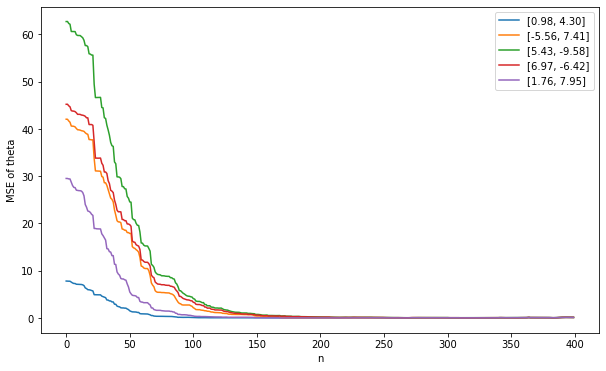

In [398]:
# time evolution of MSE- varying initial conditions
plt.figure(figsize=(10,6))
plt.plot(n, test17[4], label='[0.98, 4.30]')
plt.plot(n, test18[4], label='[-5.56, 7.41]')
plt.plot(n, test19[4], label='[5.43, -9.58]')
plt.plot(n, test20[4], label='[6.97, -6.42]')
plt.plot(n, test21[4], label='[1.76, 7.95]')
plt.xlabel('n')
plt.ylabel('MSE of theta')
plt.legend()
#plt.savefig('MSE_init_theta_tv.jpg')
plt.show()

In [399]:
# find time of convergence
group_tests = np.asarray([test17[4], test18[4], test19[4], test20[4], test21[4]])
convergence = np.zeros(5)

for i in range(5):
    for j in range(N):
        if group_tests[i][j] < 0.1:
            convergence[i] = j
            break

In [400]:
print("convergence time of test 1 was:", convergence[0])
print("convergence time of test 2 was:", convergence[1])
print("convergence time of test 3 was:", convergence[2])
print("convergence time of test 4 was:", convergence[3])
print("convergence time of test 5 was:", convergence[4])

convergence time of test 1 was: 99.0
convergence time of test 2 was: 169.0
convergence time of test 3 was: 251.0
convergence time of test 4 was: 250.0
convergence time of test 5 was: 148.0


In [401]:
test22 = kf(N, p, Q, R1, theta_init, x_tv, theta_true_tv)
test23 = kf(N, p, Q, R2, theta_init, x_tv, theta_true_tv)
test24 = kf(N, p, Q, R3, theta_init, x_tv, theta_true_tv)
test25 = kf(N, p, Q, R4, theta_init, x_tv, theta_true_tv)
test26 = kf(N, p, Q, R5, theta_init, x_tv, theta_true_tv)

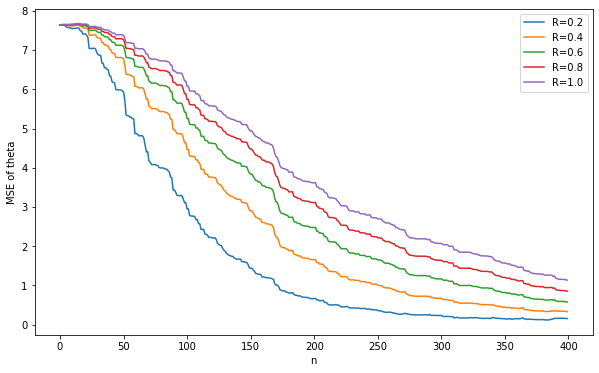

In [402]:
# time evolution of MSE- varying R (measurement variance)
plt.figure(figsize=(10,6))
plt.plot(n, test22[4], label='R=0.2')
plt.plot(n, test23[4], label='R=0.4')
plt.plot(n, test24[4], label='R=0.6')
plt.plot(n, test25[4], label='R=0.8')
plt.plot(n, test26[4], label='R=1.0')
plt.xlabel('n')
plt.ylabel('MSE of theta')
plt.legend()
#plt.savefig('MSE_R_theta_tv.jpg')
plt.show()

In [403]:
# find time of convergence
group_tests = np.asarray([test22[4], test23[4], test24[4], test25[4], test26[4]])
convergence = np.zeros(5)

for i in range(5):
    for j in range(N):
        if group_tests[i][j] < 0.1:
            convergence[i] = j
            break

In [404]:
print("convergence time of test 1 was:", convergence[0])
print("convergence time of test 2 was:", convergence[1])
print("convergence time of test 3 was:", convergence[2])
print("convergence time of test 4 was:", convergence[3])
print("convergence time of test 5 was:", convergence[4])

convergence time of test 1 was: 0.0
convergence time of test 2 was: 0.0
convergence time of test 3 was: 0.0
convergence time of test 4 was: 0.0
convergence time of test 5 was: 0.0


In [405]:
test27 = kf(N, p, Q1, R, theta_init, x_tv, theta_true_tv)
test28 = kf(N, p, Q2, R, theta_init, x_tv, theta_true_tv)
test29 = kf(N, p, Q3, R, theta_init, x_tv, theta_true_tv)
test30 = kf(N, p, Q4, R, theta_init, x_tv, theta_true_tv)
test31 = kf(N, p, Q5, R, theta_init, x_tv, theta_true_tv)
test32 = kf(N, p, Q6, R, theta_init, x_tv, theta_true_tv)

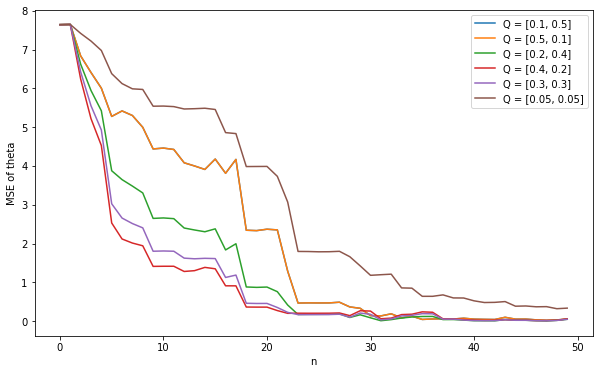

In [406]:
# time evolution of MSE- varying Q (Process Covariance)
plt.figure(figsize=(10,6))
plt.plot(n[0:50], test27[4][0:50], label='Q = [0.1, 0.5]')
plt.plot(n[0:50], test28[4][0:50], label='Q = [0.5, 0.1]')
plt.plot(n[0:50], test29[4][0:50], label='Q = [0.2, 0.4]')
plt.plot(n[0:50], test30[4][0:50], label='Q = [0.4, 0.2]')
plt.plot(n[0:50], test31[4][0:50], label='Q = [0.3, 0.3]')
plt.plot(n[0:50], test32[4][0:50], label='Q = [0.05, 0.05]')
plt.xlabel('n')
plt.ylabel('MSE of theta')
plt.legend()
#plt.savefig('MSE_Q_theta_tv.jpg')
plt.show()

In [407]:
# find time of convergence
group_tests = np.asarray([test27[4], test28[4], test29[4], test30[4], test31[4], test32[4]])
convergence = np.zeros(6)

for i in range(6):
    for j in range(N):
        if group_tests[i][j] < 0.2:
            convergence[i] = j
            break

In [408]:
print("convergence time of test 1 was:", convergence[0])
print("convergence time of test 2 was:", convergence[1])
print("convergence time of test 3 was:", convergence[2])
print("convergence time of test 4 was:", convergence[3])
print("convergence time of test 5 was:", convergence[4])
print("convergence time of test 6 was:", convergence[5])

convergence time of test 1 was: 30.0
convergence time of test 2 was: 30.0
convergence time of test 3 was: 23.0
convergence time of test 4 was: 28.0
convergence time of test 5 was: 23.0
convergence time of test 6 was: 52.0


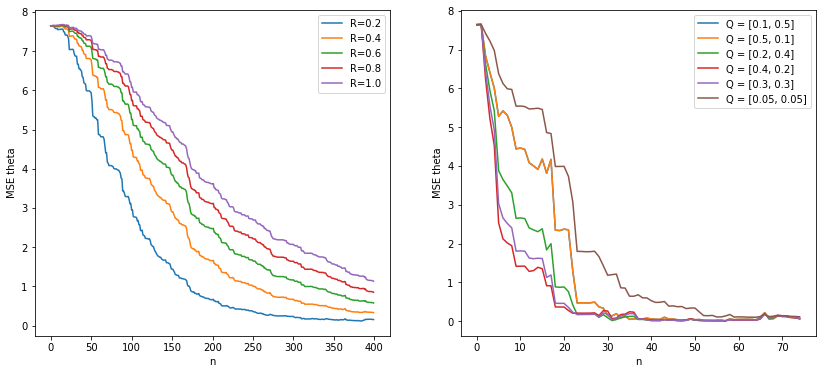

In [409]:
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="n", ylabel="MSE theta")
ax[0].plot(n, test22[4], label='R=0.2')
ax[0].plot(n, test23[4], label='R=0.4')
ax[0].plot(n, test24[4], label='R=0.6')
ax[0].plot(n, test25[4], label='R=0.8')
ax[0].plot(n, test26[4], label='R=1.0')
ax[0].legend()
ax[1].set(xlabel="n", ylabel="MSE theta")
ax[1].plot(n[0:75], test27[4][0:75], label='Q = [0.1, 0.5]')
ax[1].plot(n[0:75], test28[4][0:75], label='Q = [0.5, 0.1]')
ax[1].plot(n[0:75], test29[4][0:75], label='Q = [0.2, 0.4]')
ax[1].plot(n[0:75], test30[4][0:75], label='Q = [0.4, 0.2]')
ax[1].plot(n[0:75], test31[4][0:75], label='Q = [0.3, 0.3]')
ax[1].plot(n[0:75], test32[4][0:75], label='Q = [0.05, 0.05]')
ax[1].legend()
#plt.savefig('MSE_tv_R_Q_theta.jpg')
plt.show()